# Simple Linear Regression
In this little project, I am trying to campare simple linear regression by using least square methods ( methods that I learn during statistics class) and Machine Learning methods (using sk.learn model). The main objective of this project is to get familiar with Machine Learning basic concept and also comparing it to established statistical methods.

Based on my reading, machine Learning methods, in this case {LinearRegression} function of {sklearn.model} is based on gradient descent algortihms. I still found it ambiguous why should we use Machine Learning for simple linear regression when we can compute using the traditional methods. This little project is my own initiative to get familiar and get the answer to my doubt.

First, I compute linear regression, pearson correlation coefficient and coefficient of determination using methods that we learn in statistics class. I am comparing house price(million US dollar) vs living room area (square feet). Please mind that the data is taken from kaggle, hence it is unlikely to be reliable. The data set URL is https://www.kaggle.com/datasets/shree1992/housedata .

I am also indebt by Github username zaephaer which I learn on how he use seaborn to make heatmap.

First, we import the required library. We read the csv data using Pandas

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
%matplotlib inline

house = pd.read_csv('housing.csv')

In [4]:
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,5/2/2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,5/2/2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5/2/2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


First methods of linear regression is by using pure python calculation.  
This is standard methods of making simple linear regression by using Pearson Correlation Coefficient. 

I am comparing house price(million US dollar) vs living room area (square feet).

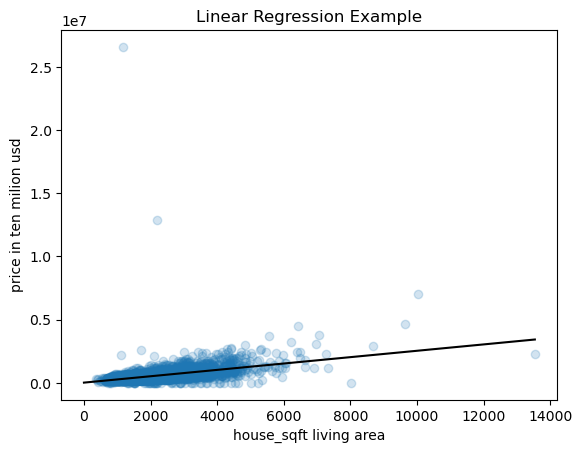


    < Summary of simple linear regression >
    Pearson Correaltion Coefficient (R) is 0.4304
    The linear regression equation is y = 251.9501x + 12954.2424
    The coefficient of determination (R^2) is  0.1853
    
    < Meaning behind this regression>
    This means that the strenght of correlation between independent and dependent variable is 43.04%,
    but the strenght of the model ( ie the accuracy of the prediction compared to the real value ) of the model is 18.529999999999998%
    Exactly 18.529999999999998% of the vatiation of dependent variable can be explained by independent variable using this model
    
    <Fit of Regression Line>
    Null hypothesis : the regression line does not capture the relationship between variables
    H0 : variance of Reg <= variance of Res
    F-value = MSReg/MSRes 
    Thus, our F-value equal to 1045.4682
    f-critical with 95% confidence level is 3.8435 
    

    F-value > F-critical, using signifance level of alpha = 0.05, Null hypothes

In [52]:
data_raw = { 0 : house.sqft_living, 1 : house.price}
data = pd.DataFrame( data_raw)

data_regression = {}
data_regression_square = {}
total_data_regression_square = {}
for i in range(0,2):
    data_regression[i] = []
    data_regression_square[i] = []
    for x in data.loc[:,i]:
        regress = x - np.mean(data.loc[:,i])
        regress_square = ( x - np.mean(data.loc[:,i]) ) ** 2
        data_regression[i].append(regress)
        data_regression_square[i].append(regress_square)
    total_data_regression_square[i] = np.sum(data_regression_square[i])

multiplication_of_regress = []
for j in range(0,1):
    for y in range(0, len(data_regression[j])):
        multiply_2_regress = data_regression[j][y] * data_regression[j+1][y]
        multiplication_of_regress.append(multiply_2_regress)
    sum_of_multiplication = np.sum(multiplication_of_regress)
    pearson_correlation_coefficient = sum_of_multiplication / ( (np.sum(data_regression_square[j]) * np.sum(data_regression_square[j+1]) )** 0.5)
    sy = ((np.sum(data_regression_square[j+1])) / (len(data_regression_square[j+1])-1))  ** 0.5 
    sx = ((np.sum(data_regression_square[j] ))/ (len(data_regression_square[j])-1))  ** 0.5 
    b = pearson_correlation_coefficient * sy / sx
    a = np.mean(data.loc[:,j+1]) - b * np.mean(data.loc[:,j])
    x = np.linspace(0,max(data.loc[:,j]),20) 
    y_score = []
    for k in x:
        y = b * k + a
        y_score.append(y)
prediction= []
for l in data.loc[:,0]:
    y = b * l + a 
    prediction.append(y)
random_error = prediction - data.loc[:,1]        
SST = []
SSReg = []
SSRes = []
for m in range(0,len(data.loc[:,1])):
    sst = (data.loc[:,1][m] - np.mean(data.loc[:,1])) ** 2
    SST.append(sst)
    ssreg = (prediction[m] - np.mean(data.loc[:,1])) ** 2
    SSReg.append(ssreg)
    ssres = (data.loc[:,1][m] - prediction[m]) ** 2
    SSRes.append(ssres)
Total_SST = np.sum(SST)
Total_SSReg = np.sum(SSReg)
Total_SSRes = np.sum(SSRes)
R_squared = Total_SSReg / Total_SST
MSRes = Total_SSRes / (len(data.loc[:,1])-2)
MSReg = Total_SSReg / 1
f_value = MSReg / MSRes
f_critical = stats.f.ppf(q = 0.95, dfn = 1, dfd = (len(data.loc[:,1])-2))


plt.plot(x, y_score, color = 'black')
plt.title('Linear Regression Example')
plt.xlabel('house_sqft living area')
plt.ylabel('price in ten milion usd')
plt.scatter(data.loc[:,j],data.loc[:,j+1],alpha = 0.2)
plt.show()
    
text =    f"""
    < Summary of simple linear regression >
    Pearson Correaltion Coefficient (R) is {round(pearson_correlation_coefficient,4)}
    The linear regression equation is y = {round(b,4)}x + {round(a,4)}
    The coefficient of determination (R^2) is  {round(R_squared,4)}
    
    < Meaning behind this regression>
    This means that the strenght of correlation between independent and dependent variable is {round(pearson_correlation_coefficient,4) * 100}%,
    but the strenght of the model ( ie the accuracy of the prediction compared to the real value ) of the model is {round(R_squared,4) * 100}%
    Exactly {round(R_squared,4) * 100}% of the vatiation of dependent variable can be explained by independent variable using this model
    
    <Fit of Regression Line>
    Null hypothesis : the regression line does not capture the relationship between variables
    H0 : variance of Reg <= variance of Res
    F-value = MSReg/MSRes 
    Thus, our F-value equal to {round(f_value,4)}
    f-critical with 95% confidence level is {round(f_critical,4)} 
    """
print(text)

if f_value > f_critical:
    print("""
    F-value > F-critical, using signifance level of alpha = 0.05, Null hypothesis is rejected.
    We can accept that the regression line is a good fit for data with 95% confidence level
    
    """)
else:
    print("""
    F-value < F-critical, using signifance level of alpha = 0.05, Null hypothesis is failed to be rejected.
    We can not accept that the regression line is a good fit for data with 95% confidence level
    
    """)

Next, I am going to use LinearRegression function from {sklearn.model}. All facts are as belows:

{LinearRegression} function of {sklearn.model} is based on gradient descent algortihms. LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

We divide our sample into 2, which is the training data and testing data.
The train data are used to make regression line. The test data are used to test whether the regression line is fit enough. For the example below, the test data and train data proportion are as below:

1. test_size : 40% of data for training
2. train_size : 60% of all data

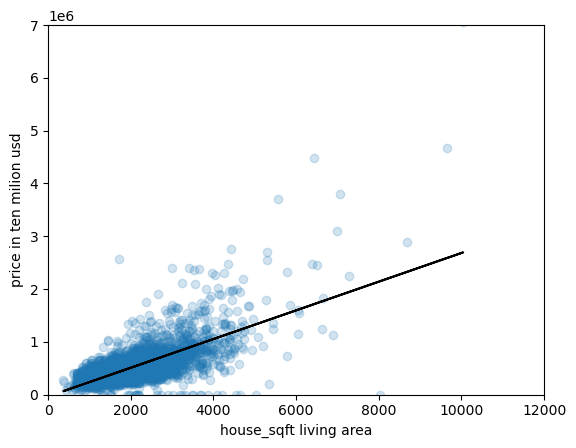


    < Summary of simple linear regression >
    The linear regression equation is y = [271.69575606]x + -34779.170499073574
    


In [56]:
#Train

from sklearn.model_selection import train_test_split
x = data[0]
y = data[1]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.4, random_state = 42) #give the test size 40%

#the data is take randomly 40% for train
#reshape into array (1 dimentional array)

#random state = None --> If you call the same function multiple times with random_state=None, 
#that function will produce different results across different executions.

# random_state = 42 is just a random number that helps to reproduce the same result after reuse the train_test_split. 
# If we want, we can choose other numbers as well.

x_train = np.array(x_train).reshape(-1,1) #automatically calculate the dimentions of the rows, all column should have dimention of  11
x_test = np.array(x_test).reshape(-1,1)   #automatically calculate the dimentions of the rows,all column should have dimention of 1

#we use Linear Regression Model in sklearn, set is as lr
#use c as lr.intercept_ and m as lr.coef_ 

from sklearn.linear_model import LinearRegression
lr = LinearRegression() #the model
lr.fit(x_train,y_train)
c = lr.intercept_
m = lr.coef_

#use the m and c calculated above to compare the result
#we can use lr.predict fucntion to predict the y-pred for x value

y_pred_train = m *x_train + c
y_pred_train.flatten() #change to one dimentional array
y_pred_train1= lr.predict(x_train)  # this is same as  [ y_pred_train = m *x_train + c ]  
plt.scatter(x_train,y_train,alpha = 0.2)
plt.plot(x_train,y_pred_train,color = 'black')
plt.xlabel('house_sqft living area')
plt.ylabel('price in ten milion usd')
ax = plt.gca()
ax.set_xlim([0, 12000])
ax.set_ylim([0, 7000000])
plt.show()

text =    f"""
    < Summary of simple linear regression >
    The linear regression equation is y = {m}x + {c}
    """
print(text)

(0.0, 7000000.0)

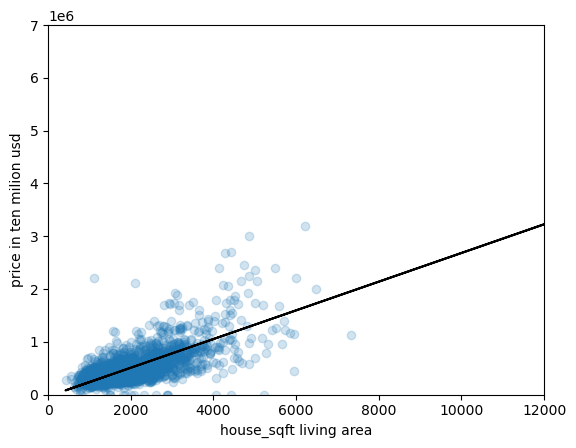

In [45]:
#Test

y_pred_test= lr.predict(x_test) # using the same m (coefficient) and c (intercept)
plt.scatter(x_test,y_test,alpha = 0.2)


plt.plot(x_test,y_pred_test,color = 'black')
plt.xlabel('house_sqft living area')
plt.ylabel('price in ten milion usd')
ax = plt.gca()
ax.set_xlim([0, 12000])
ax.set_ylim([0, 7000000])

# Correlation

We should calculate the correlation between house prices and other variables.\
It's tiring to try calculate the correlation one by one, luckily pandas have the function to do that\
We use DataFrame.corr() to calculate Pearson Correlation Coefficient. Then , we use Seaborn heatmap to see the intensity of each correlation. 

Correlation coefficient : r = 0 is no-correlation\
                          r - 1 is complete positive correlation\
                          r = -1 is complete negative correlation\
                          absolute value of r > 0.7 is strong correlation, anything below that is weak correlation

In [59]:
#read the columns(variables) that we want to compare
data_correlate = pd.read_csv('housing.csv', usecols = ['price','sqft_living','sqft_lot','bedrooms','floors','condition','yr_built'])
data_correlate.head()

,price,bedrooms,sqft_living,sqft_lot,floors,condition,yr_built
0,313000.0,3,1340,7912,1.5,3,1955
1,2384000.0,5,3650,9050,2.0,5,1921
2,342000.0,3,1930,11947,1.0,4,1966
3,420000.0,3,2000,8030,1.0,4,1963
4,550000.0,4,1940,10500,1.0,4,1976


Correlation using seaborn heatmap


Note that the correlations are below 0.7 for price vs all variables\
Note to self: end the prediction here. No valuable insight from data

The correlation of house price vs sqft_living is same as the one that I did manually using simple linear regression\
Pearson Correaltion Coefficient (R) is 0.430\
I can say that methods below correspond with the standard linear regression methods that I knew from statistics class

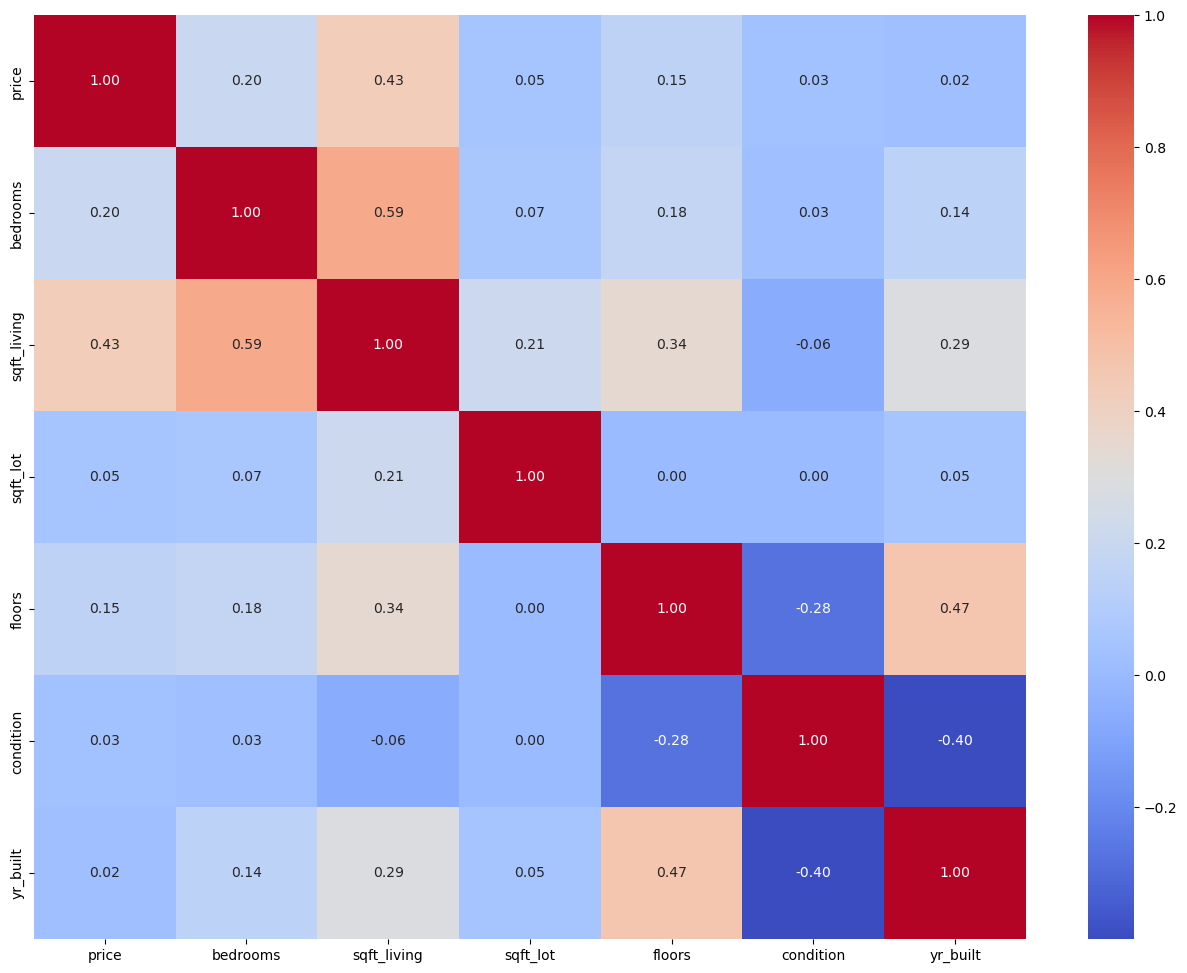

In [64]:
import seaborn as sns
plt.figure(figsize=(16,12))
sns.heatmap(data=data_correlate.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [62]:
#in the above we use pandas pd.corr and change it to heatmap using Seaborn 
data_correlate.corr()

,price,bedrooms,sqft_living,sqft_lot,floors,condition,yr_built
price,1.000000,0.200336,0.430410,0.050451,0.151461,0.034915,0.021857
bedrooms,0.200336,1.000000,0.594884,0.068819,0.177895,0.025080,0.142461
sqft_living,0.430410,0.594884,1.000000,0.210538,0.344850,-0.062826,0.287775
sqft_lot,0.050451,0.068819,0.210538,1.000000,0.003750,0.000558,0.050706
floors,0.151461,0.177895,0.344850,0.003750,1.000000,-0.275013,0.467481
condition,0.034915,0.025080,-0.062826,0.000558,-0.275013,1.000000,-0.399698
yr_built,0.021857,0.142461,0.287775,0.050706,0.467481,-0.399698,1.000000


Maybe next time we can remove the outliers and see if the correlation will increase.
We can remove outliers on the basis that, the  top 95 of house prices are too high and we want to make the model for middle-income houses. 